In [43]:
# level3 codveda
#apply Processing(NLP)- Sentiment Analysis on Sentiment dataset

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/3) Sentiment dataset.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Platform'].unique()

array([' Twitter  ', ' Instagram ', ' Facebook ', ' Twitter '],
      dtype=object)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

tokenization

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Tokenization
    tokens = word_tokenize(text.lower())

    # 2. Remove stopwords and non-alphabetic tokens
    filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

    # 3a. Apply Stemming
    stemmed = [stemmer.stem(w) for w in filtered_tokens]

    # 3b. Apply Lemmatization (instead of stemming if you prefer)
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered_tokens]

    return {
        "tokens": tokens,
        "filtered": filtered_tokens,
        "stemmed": stemmed,
        "lemmatized": lemmatized
    }

# Apply preprocessing to dataset
df["processed"] = df["Text"].apply(preprocess_text)

# Show first few results
print(df[["Text", "processed"]].head())

                        lemmatized  \
0         enjoy beautiful day park   
1         traffic terrible morning   
2           finish amazing workout   
3  excite upcoming weekend getaway   
4    try new recipe dinner tonight   

                                           processed  
0  {'tokens': ['enjoying', 'a', 'beautiful', 'day...  
1  {'tokens': ['traffic', 'was', 'terrible', 'thi...  
2  {'tokens': ['just', 'finished', 'an', 'amazing...  
3  {'tokens': ['excited', 'about', 'the', 'upcomi...  
4  {'tokens': ['trying', 'out', 'a', 'new', 'reci...  


removing stopwords and lemmatization

In [ ]:
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default noun


df["lemmatized"] = df["Text"].apply(lambda x: " ".join(
    [lemmatizer.lemmatize(word, get_wordnet_pos(tag))
     for word, tag in pos_tag(word_tokenize(x.lower()))
     if word.isalpha() and word not in stop_words]
))

print(df[["Text", "lemmatized"]].head())

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                        lemmatized  
0         enjoy beautiful day park  
1         traffic terrible morning  
2           finish amazing workout  
3  excite upcoming weekend getaway  
4    try new recipe dinner tonight  


Use nltk for sentiment analysis.

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()

df["compound_score"] = df["Text"].apply(lambda x: sia.polarity_scores(x)["compound"])

df["sentiment_predicted"] = df["compound_score"].apply(
    lambda score: "Positive" if score > 0.05 else ("Negative" if score < -0.05 else "Neutral")
)

print(df[["Text", "compound_score", "sentiment_predicted"]].head(10))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                Text  compound_score  \
0   Enjoying a beautiful day at the park!        ...          0.8221   
1   Traffic was terrible this morning.           ...         -0.4767   
2   Just finished an amazing workout! 💪          ...          0.6239   
3   Excited about the upcoming weekend getaway!  ...          0.4003   
4   Trying out a new recipe for dinner tonight.  ...          0.0000   
5   Feeling grateful for the little things in lif...          0.5423   
6   Rainy days call for cozy blankets and hot coc...         -0.0772   
7   The new movie release is a must-watch!       ...          0.0000   
8   Political discussions heating up on the timel...          0.0000   
9   Missing summer vibes and beach days.         ...         -0.2960   

  sentiment_predicted  
0            Positive  
1            Negative  
2            Positive  
3            Positive  
4             Neutral  
5            Positive  
6            Negative  
7             N

Visualize the sentiment distribution and word
frequencies using word clouds.

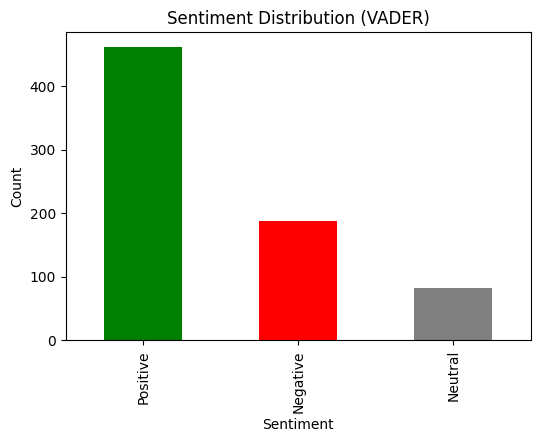

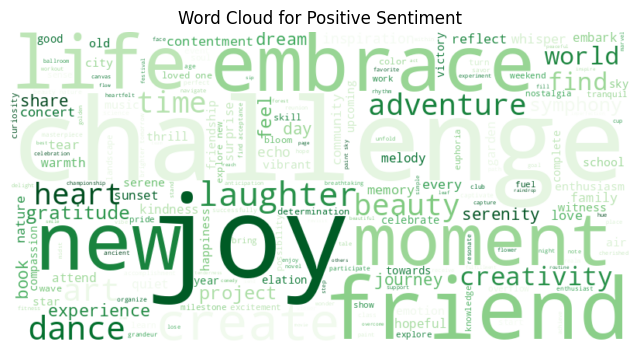

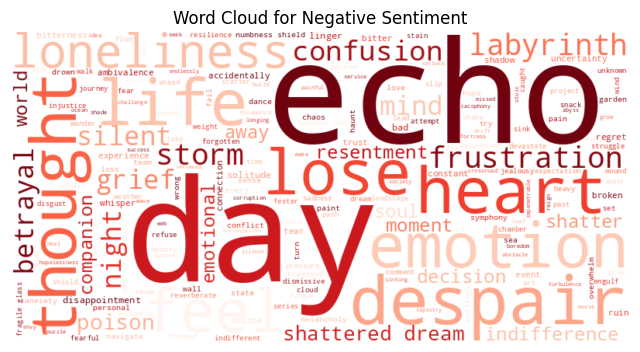

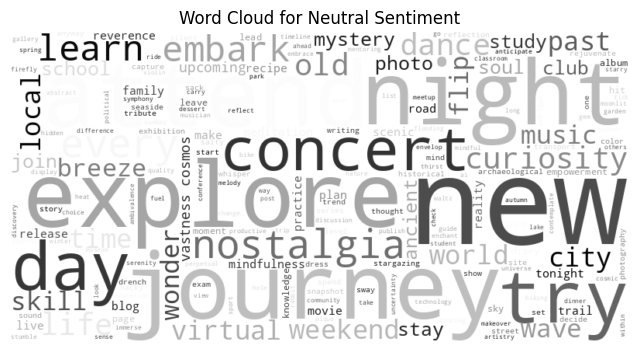

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Sentiment Distribution
sentiment_counts = df["sentiment_predicted"].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

#Word Clouds
def plot_wordcloud(sentiment_label, color):
    text = " ".join(df[df["sentiment_predicted"] == sentiment_label]["lemmatized"])
    wordcloud = WordCloud(width=800, height=400, background_color="white", colormap=color).generate(text)
    plt.figure(figsize=(8,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment_label} Sentiment")
    plt.show()

# WordClouds per sentiment
plot_wordcloud("Positive", "Greens")
plot_wordcloud("Negative", "Reds")
plot_wordcloud("Neutral", "gray")
